In [1]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Load MNIST dataset from tenserflow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Normalize the data (convert pixel values from 0-255 to 0-1)
x_train, x_test = x_train/255.0, x_test/255.0
print(f"Training Data Shape: {x_train.shape}, Testing DataShape: {x_test.shape}")


Training Data Shape: (60000, 28, 28), Testing DataShape: (10000, 28, 28)


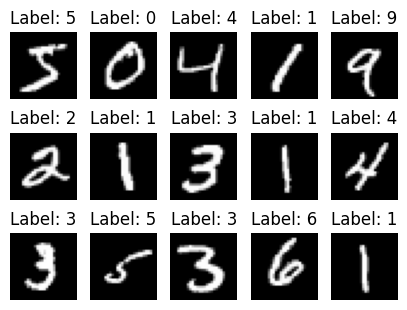

In [18]:
# showing some image of dataset
plt.figure(figsize=(5, 5))
for i in range(15):
  plt.subplot(4, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()


In [9]:
# Build a Neural Network Model
# We can creeate a simple deep learning model using tenserflow's SEQUENTIAL api
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), # flattten 28x28 imaged to 1D
  tf.keras.layers.Dense(128, activation='relu'), # fully connected layers
  tf.keras.layers.Dropout(0.2), # prevent overfitting
  tf.keras.layers.Dense(10, activation='softmax') # output layer (10 classes)
])

# compile the model summary
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# now print the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5246 - loss: 1.7312 - val_accuracy: 0.8462 - val_loss: 0.6407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8338 - loss: 0.6173 - val_accuracy: 0.8920 - val_loss: 0.4243
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8688 - loss: 0.4590 - val_accuracy: 0.9037 - val_loss: 0.3557
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8860 - loss: 0.3955 - val_accuracy: 0.9099 - val_loss: 0.3230
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8950 - loss: 0.3606 - val_accuracy: 0.9134 - val_loss: 0.3010


In [11]:
# evalute model performance on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9134 - loss: 0.3010

Test accuracy: 0.9134


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


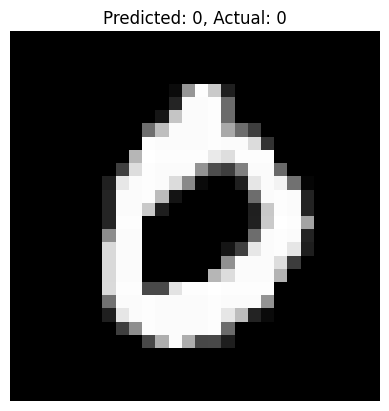

In [14]:

# Make predictions
predictions = model.predict(x_test)

# show one example
index = 3 # change index to test different images
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()